# Importamos numpy e carregamos um arquivo para ser usado no teste da função

In [1]:
import numpy as np
arquivo=np.loadtxt("dados\\brazil-TAVG-Trend.txt", comments='%')

# Definimos as variáveis "anos" e "meses" e definimos a função "anos_dec"

In [17]:
anos=arquivo[:,0]
meses=arquivo[:,1]
def anos_dec(anos, meses):
    assert type(anos)==np.ndarray, "Tipo de variável errada. Use um array"
    assert type(meses)==np.ndarray, "Tipo de variável errada. Use um array"
    return anos+(meses-1)/12

# Testamos a função com uma variável que não corresponde ao tipo necessário para a função

In [18]:
anos_dec(1,1)

AssertionError: Tipo de variável errada. Use um array

# Testamos a função com os dados do arquivo carregado

In [3]:
anos_dec(anos, meses)

array([ 1832.        ,  1832.08333333,  1832.16666667, ...,  2013.5       ,
        2013.58333333,  2013.66666667])

# Definimos a função que recebe  uma matriz de dados de temperaturas e retorna os anos decimais, a anomalia anual, anomalia de 10 anos e sua respectiva incerteza

In [19]:
def temp_anodec_anomanual_incanomanual_ano10_incano10(arquivo):
    assert type(arquivo) == np.ndarray, "Tipo de variável errada. Use um array"
    anos_dec(anos, meses)
    anomanual=np.nan_to_num(arquivo[:,4])
    incanomanual=np.nan_to_num(arquivo[:,5])
    ano10=np.nan_to_num(arquivo[:,8])
    incano10=np.nan_to_num(arquivo[:,9])
    return (anos_dec(anos, meses),anomanual, incanomanual, ano10, incano10)

# Testamos a função com uma variável com tipo que não corresponde ao necessário para a função

In [20]:
temp_anodec_anomanual_incanomanual_ano10_incano10(1)

AssertionError: Tipo de variável errada. Use um array

# Testamos a função com os dados do arquivo carregado

In [12]:
temp_anodec_anomanual_incanomanual_ano10_incano10(arquivo)

(array([ 1832.        ,  1832.08333333,  1832.16666667, ...,  2013.5       ,
         2013.58333333,  2013.66666667]),
 array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 array([ 0.,  0.,  0., ...,  0.,  0.,  0.]))

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import glob 
# Importamos as bibliotecas necessárias para o trabalho.

In [23]:
arquivos= glob.glob('dados/*.txt')
#Pegamos todos os arquivos na pasta 'dados' com o formato .txt

# Definimos uma função para plotar gráficos com titulo e nome dos eixos

In [34]:
def plot_graficos(arquivo):
    dados= np.loadtxt(arquivo,comments='%')
    ano_dec= dados[:,0]+(1/12)*(dados[:,1]-1)
    anom_anual=dados[:,4]
    anom_deca= dados[:,8]
    std= np.std(anom_anual)
    plt.figure()
    plt.plot(ano_dec,anom_anual)
    plt.xlabel('Anos')
    plt.ylabel('Anomalia de Temperatura')
    plt.title(arquivo[6:-15])

# Usamos a função para gerar os gráficos da prática python2

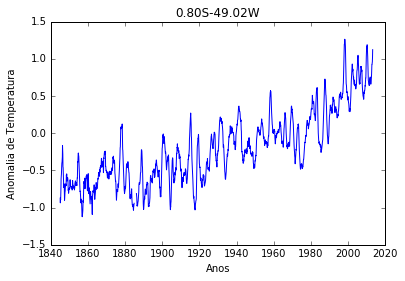

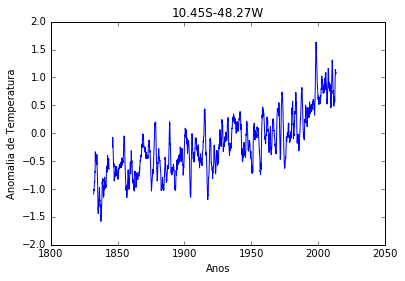

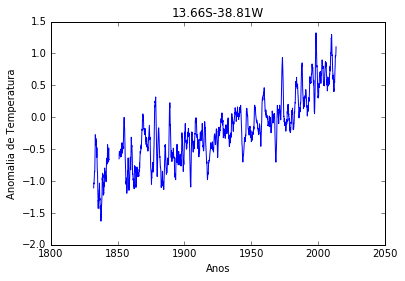

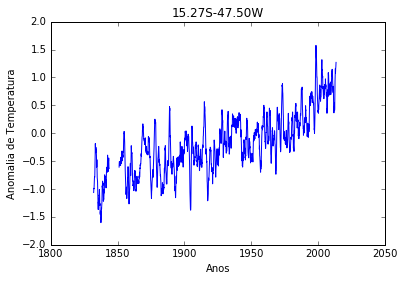

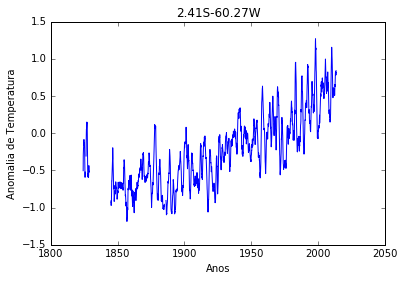

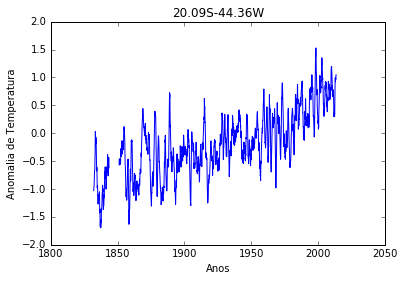

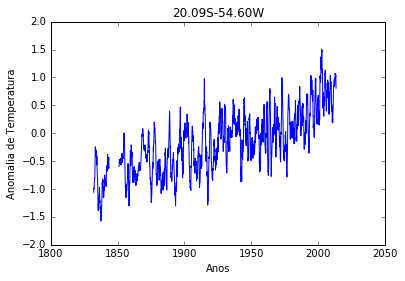

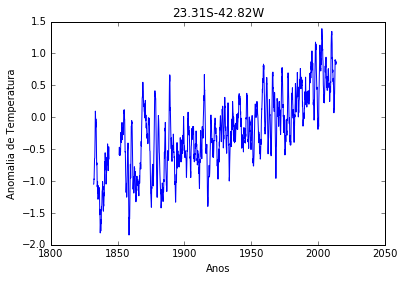

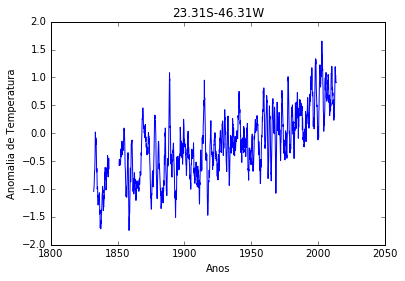

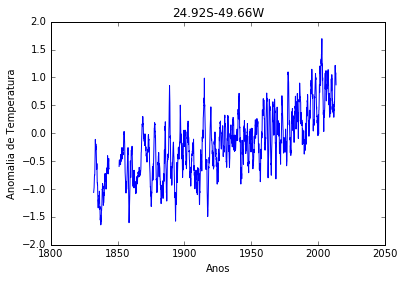

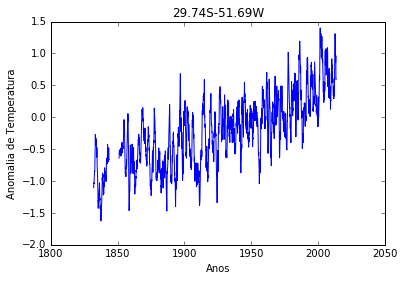

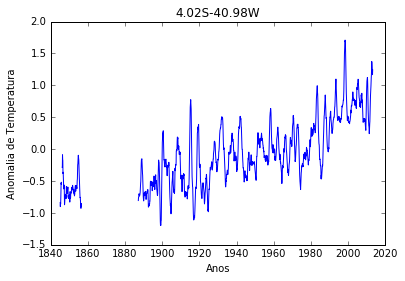

In [35]:
for arquivo in arquivos[0:12]:
    plot_graficos(arquivo)